In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import chardet

# Detect encoding of the CSV file
with open('/content/spam.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

# Read CSV file using detected encoding
df = pd.read_csv('/content/spam.csv', encoding=encoding)

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Load the dataset
# df = pd.read_csv("/kaggle/input/spamcsv/spam.csv", encoding='latin-1')

# Display the dataset
df

# Check information about the dataset
df.info()

# Drop unnecessary columns
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

# Rename columns for better readability
new_column_names = {"v1": "Category", "v2": "Message"}
df.rename(columns=new_column_names, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


df.head(10)

In [7]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
data = df.where((pd.notnull(df)), ' ')


In [9]:
df.shape

(5572, 2)

In [10]:
# now from category to number
df.loc[df["Category"]=="spam","Category"]=0
df.loc[df["Category"]=="ham","Category"]=1

In [11]:
df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# split into X and Y
X=df["Message"]
Y=df["Category"]
print(X)
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [15]:
# ?split the data set into trianing and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [19]:
# Diaplay the shapes of the splits

print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)
(5572,)
(4457,)
(1115,)


In [23]:
feature_extrct=TfidfVectorizer(min_df=1,stop_words="english",lowercase=True)
X_train_features=feature_extrct.fit_transform(X_train)
X_test_features=feature_extrct.transform(X_test)

In [25]:
Y_test=Y_test.astype("int")
Y_train=Y_train.astype("int")

In [27]:
model=LogisticRegression()
model.fit(X_train_features,Y_train)

LogisticRegression()

In [30]:
predict_on_train_data=model.predict(X_train_features)
accu_on_train_data=accuracy_score(Y_train,predict_on_train_data)
print("accuracy on training data : ", accu_on_train_data)

accuracy on training data :  0.9661207089970832


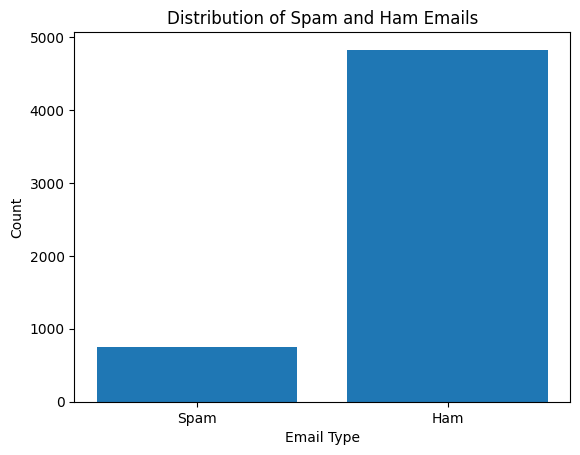

In [32]:
spam_count = df[df['Category'] == 0].shape[0]
ham_count = df[df['Category'] == 1].shape[0]
plt.bar(['Spam', 'Ham'], [spam_count, ham_count])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Emails')
plt.show()

In [33]:
#  now for the test data accuracy
predict_on_test_data=model.predict(X_test_features)
accu_on_test_data=accuracy_score(Y_test,predict_on_test_data)
print("accuracy on training data : ", accu_on_test_data)

accuracy on training data :  0.9623318385650225


In [34]:
# now creating the confusion matrix
cm=confusion_matrix(Y_test,predict_on_test_data)

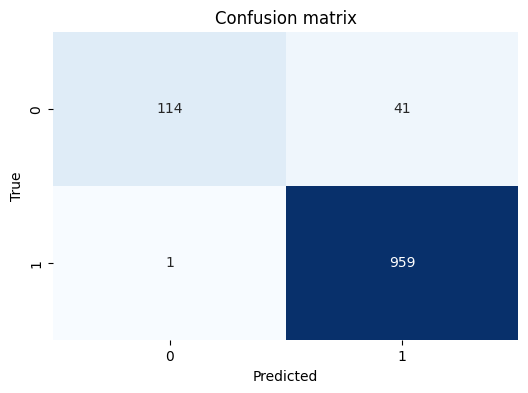

In [38]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


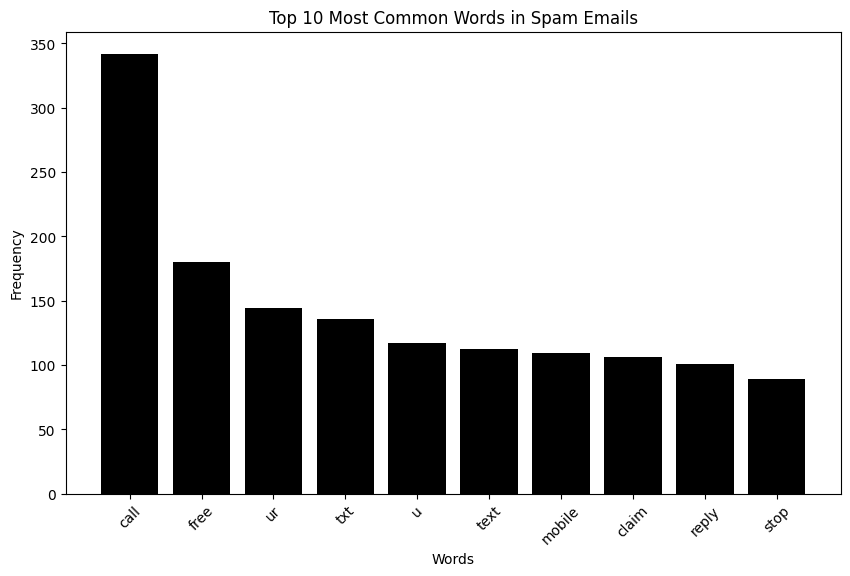

In [42]:
#
#  Count and visualize the most common words in spam emails
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
spam_words = " ".join(df[df['Category'] == 0]['Message']).split()
ham_words = " ".join(df[df['Category'] == 1]['Message']).split()

spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_word_freq.most_common(10)), color='black')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()

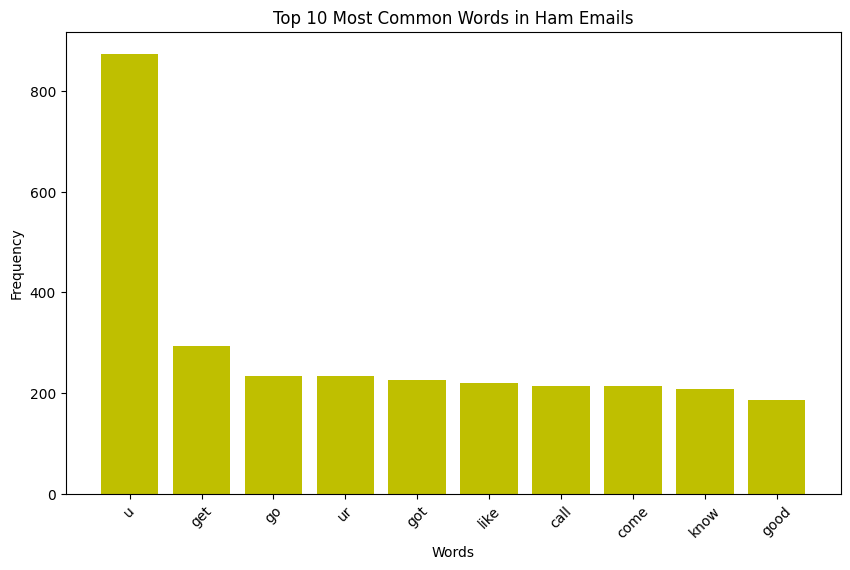

In [43]:
ham_word_freq = Counter([word.lower() for word in ham_words if word.lower() not in stop_words and word.isalpha()])
plt.figure(figsize=(10, 6))
plt.bar(*zip(*ham_word_freq.most_common(10)), color='y')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Ham Emails')
plt.xticks(rotation=45)
plt.show()